In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")

In [27]:
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312


In [28]:
police_killings.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [29]:
police_killings.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [30]:
Race_Counts = police_killings["raceethnicity"].value_counts()
Race_Counts_Perc = Race_Counts / sum(Race_Counts)

In [31]:
Race_Counts_Perc

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

In [38]:
Race_Counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [40]:
race_pop_perc = pd.Series([0.62,0.18,0.12,0.02,0.06,0.01], index=Race_Counts.index)
race_pop_perc

White                     0.62
Black                     0.18
Hispanic/Latino           0.12
Unknown                   0.02
Asian/Pacific Islander    0.06
Native American           0.01
dtype: float64

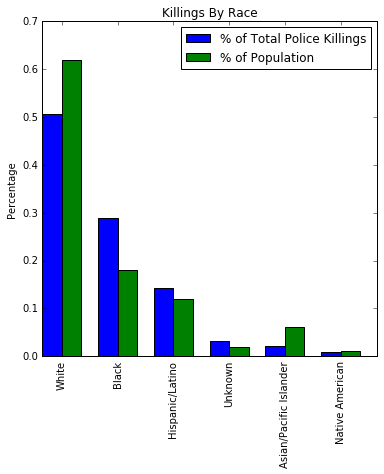

In [87]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)

locs = np.arange(len(Race_Counts))
width = 0.35
adjusted_locs = locs + width

bar1 = ax1.bar(locs, Race_Counts_Perc, width, color = 'blue')
bar2 = ax1.bar(adjusted_locs, race_pop_perc, width, color = "green")
plt.xticks(adjusted_locs, Race_Counts_Perc.index, rotation="vertical")
plt.legend((bar1, bar2), ("% of Total Police Killings", "% of Population"), loc = 'upper right' )
plt.title("Killings By Race")
plt.ylabel("Percentage")

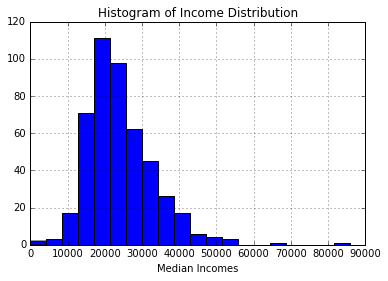

In [86]:
police_killings["p_income"].hist(bins=20)
plt.title("Histogram of Income Distribution")
plt.xlabel("Median Incomes")

In [220]:
income = police_killings["p_income"]

In [221]:
state_pop = pd.read_csv("state_population2.csv")

In [222]:
state_abbrev = pd.read_csv("state_table.csv")

In [223]:
states_list = state_abbrev.merge(state_pop, on="STATE")

In [224]:
states_list = states_list.rename(columns={'STATE':'Name','abbreviation':'state'})

In [225]:
police_killings = police_killings.merge(states_list, on = "state")

In [226]:
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,Name_y,Census_y,Name_x,Census_x,Name_y,Census_y,Name_x,Census_x,Name_y,Census_y
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736"
1,Anthony Briggs,36,Male,Black,May,25,2015,1100 E Gateway Dr SE,Huntsville,AL,...,Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736"
2,Douglas Harris,77,Male,Black,March,27,2015,7901 1st Ave S,Birmingham,AL,...,Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736"
3,Fletcher Stewart,46,Male,White,February,11,2015,Booger Hollow Rd,Dadeville,AL,...,Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736"
4,Gilbert Fleury,54,Male,White,March,11,2015,Cliffs Landing Rd,Bay Minette,AL,...,Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736",Alabama,"4,779,736"


In [227]:
counts = police_killings["state"].value_counts()

In [228]:
state_kills = pd.DataFrame({"state": counts.index, "shootings": counts})
state_kills

,shootings,state
CA,74,CA
TX,46,TX
FL,29,FL
AZ,25,AZ
OK,22,OK
GA,16,GA
NY,14,NY
CO,12,CO
NJ,11,NJ
WA,11,WA


In [229]:
state_kills = state_kills.merge(states_list, on = 'state')
state_kills

,shootings,state,Name,Census
0,74,CA,California,"37,253,956"
1,46,TX,Texas,"25,145,561"
2,29,FL,Florida,"18,801,310"
3,25,AZ,Arizona,"6,392,017"
4,22,OK,Oklahoma,"3,751,351"
5,16,GA,Georgia,"9,687,653"
6,14,NY,New York,"19,378,102"
7,12,CO,Colorado,"5,029,196"
8,11,NJ,New Jersey,"8,791,894"
9,11,WA,Washington,"6,724,540"


In [230]:
state_kills['Census'] = state_kills['Census'].replace(',', '')
state_kills.head()

,shootings,state,Name,Census
0,74,CA,California,"37,253,956"
1,46,TX,Texas,"25,145,561"
2,29,FL,Florida,"18,801,310"
3,25,AZ,Arizona,"6,392,017"
4,22,OK,Oklahoma,"3,751,351"


In [209]:
states_list

,Name,state,Census
0,Alabama,AL,"4,779,736"
1,Alaska,AK,"710,231"
2,Arizona,AZ,"6,392,017"
3,Arkansas,AR,"2,915,918"
4,California,CA,"37,253,956"
5,Colorado,CO,"5,029,196"
6,Connecticut,CT,"3,574,097"
7,Delaware,DE,"897,934"
8,Florida,FL,"18,801,310"
9,Georgia,GA,"9,687,653"


In [210]:
states_list['Census']

0      4,779,736
1        710,231
2      6,392,017
3      2,915,918
4     37,253,956
5      5,029,196
6      3,574,097
7        897,934
8     18,801,310
9      9,687,653
10     1,360,301
11     1,567,582
12    12,830,632
13     6,483,802
14     3,046,355
15     2,853,118
16     4,339,367
17     4,533,372
18     1,328,361
19     5,773,552
20     6,547,629
21     9,883,640
22     5,303,925
23     2,967,297
24     5,988,927
25       989,415
26     1,826,341
27     2,700,551
28     1,316,470
29     8,791,894
30     2,059,179
31    19,378,102
32     9,535,483
33       672,591
34    11,536,504
35     3,751,351
36     3,831,074
37    12,702,379
38     1,052,567
39     4,625,364
40       814,180
41     6,346,105
42    25,145,561
43     2,763,885
44       625,741
45     8,001,024
46     6,724,540
47     1,852,994
48     5,686,986
49       563,626
Name: Census, dtype: object

In [234]:
states_list['Census'] = states_list['Census'].apply(lambda x: x.replace(',',''))


AttributeError: 'numpy.float64' object has no attribute 'replace'

308143815.0

In [128]:
states_list['shootings_norm'] = states_list['shootings']/states_list['Census']

TypeError: unsupported operand type(s) for /: 'float' and 'str'